In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# Create an empty graph
G = nx.Graph()

# Start with 2 nodes connected by a single edge
G.add_edge(0, 1)


In [2]:
def add_node_with_preferential_attachment(G):
    # Get a flattened list of nodes where the frequency of each node is proportional to its degree
    nodes_by_degree = []
    for node in G.nodes():
        nodes_by_degree.extend([node] * G.degree(node))
    
    # Pick a random node to connect the new node to, based on degree
    if len(nodes_by_degree) > 0:
        new_node = len(G.nodes())
        target_node = random.choice(nodes_by_degree)
        G.add_edge(new_node, target_node)

# Step 3: Add more nodes until we have a 100-node network
for _ in range(98):  # We already have 2 nodes
    add_node_with_preferential_attachment(G)


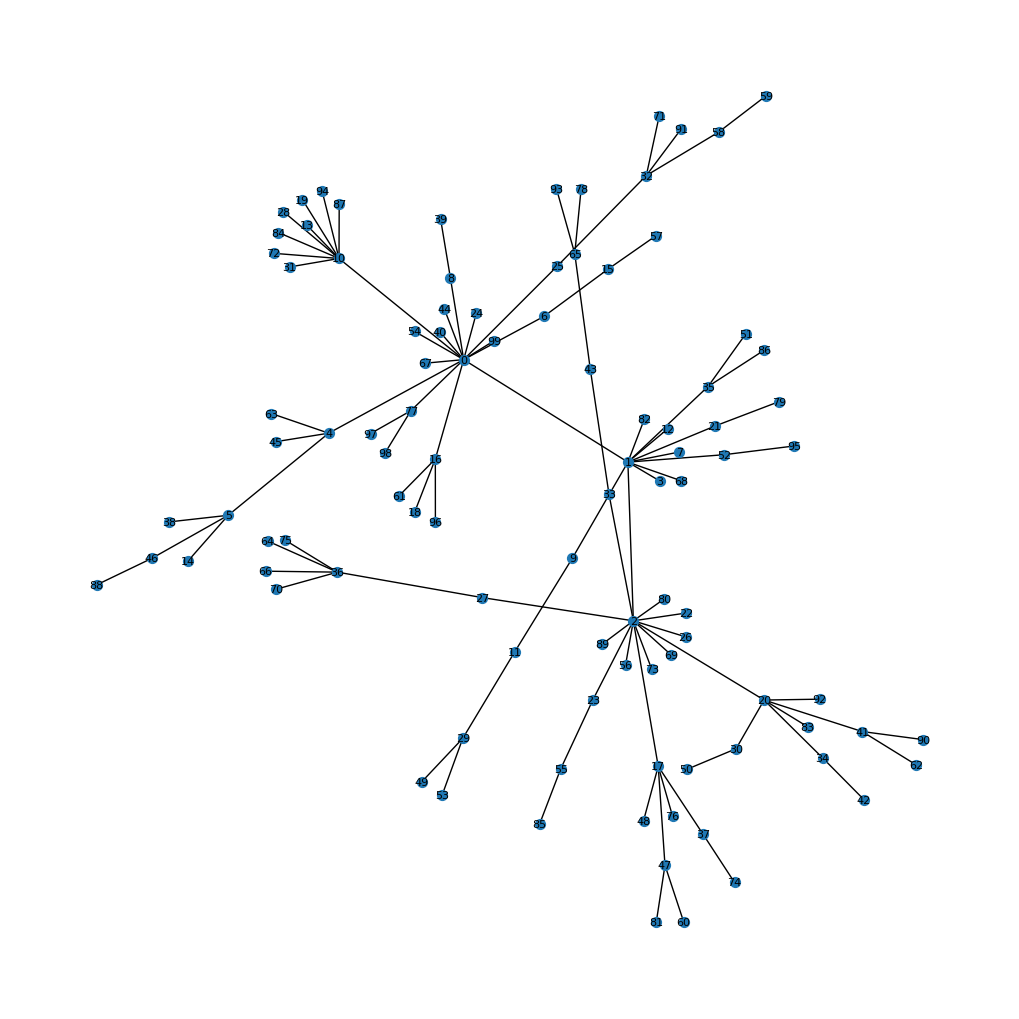

In [3]:
# Plot the 100-node BA network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()


In [4]:
# Continue adding nodes until we have 5000 nodes
for _ in range(4900):  # We already have 100 nodes
    add_node_with_preferential_attachment(G)


In [5]:
degrees = [G.degree(n) for n in G.nodes()]
max_degree = max(degrees)
min_degree = min(degrees)

print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")


Maximum degree: 125
Minimum degree: 1


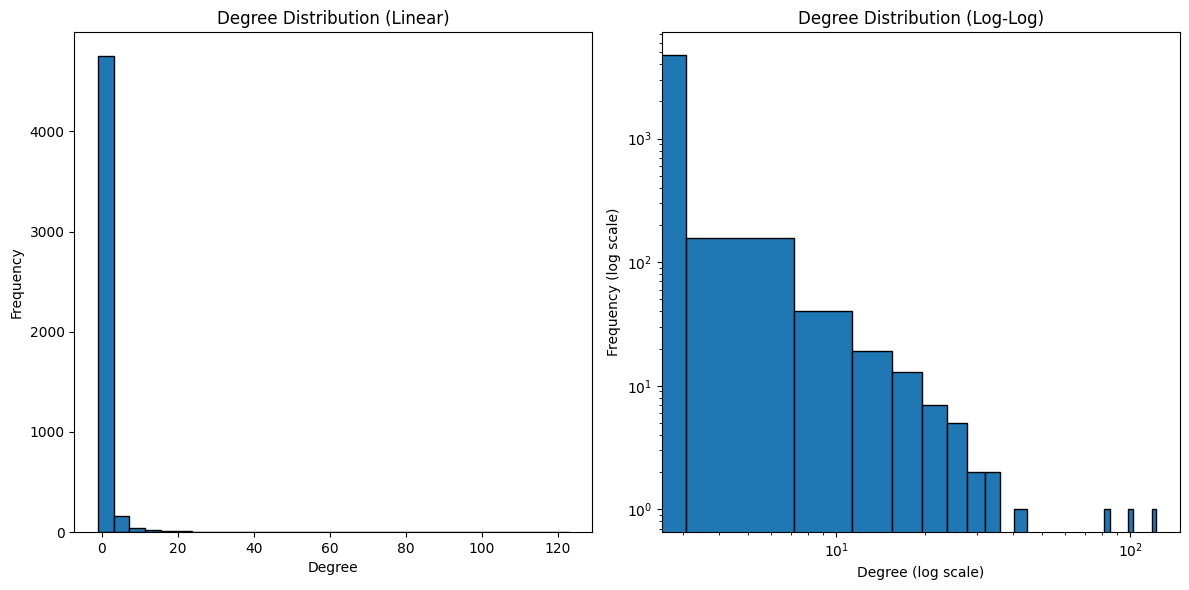

In [6]:
# Bin the degree distribution
hist, bins = np.histogram(degrees, bins=30)

# Plot the histogram on linear and log-log scales
plt.figure(figsize=(12, 6))

# Linear scale plot
plt.subplot(121)
plt.bar(bins[:-1], hist, width=bins[1] - bins[0], edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Linear)')

# Log-log scale plot
plt.subplot(122)
plt.bar(bins[:-1], hist, width=bins[1] - bins[0], edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Log-Log)')

plt.tight_layout()
plt.show()
